In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
## Set Paths & Device
MODEL_PATH = "model/model.pt"
CLASS_PATH = "model/class_names.txt"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
## Load Class Names
with open(CLASS_PATH, "r") as f:
    class_names = [line.strip() for line in f]


In [ ]:
## Load the same architecture as used in training
model = models.mobilenet_v2(weights=None)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, len(class_names))

## Load trained weights
model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE))
model = model.to(DEVICE)
model.eval()


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
## Transforms
transform = transforms.Compose([
    transforms.Resize((180, 180)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

In [ ]:
## Prediction Function
def predict_image(image_path):
    img = Image.open(image_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0).to(DEVICE)

    with torch.no_grad():
        outputs = model(img_tensor)
        _, predicted = torch.max(outputs, 1)

    return class_names[predicted.item()]


In [ ]:
## Predict image label
image_path = "dataset/Horse/Horse_2_2.jpg"
result = predict_image(image_path)
print("Predicted Label:", result)
# C:\Users\halde\image-classification\dataset\Elephant\Elephant_2_2.jpg

Predicted Label: Horse


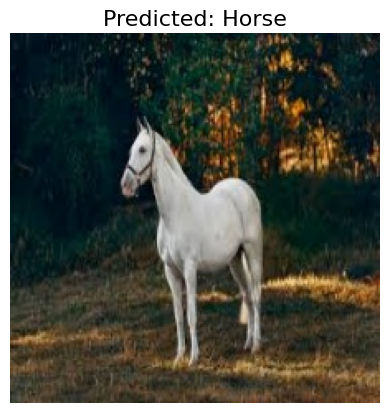

In [ ]:
## Show image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(f"Predicted: {result}", fontsize=16)
plt.axis('off')
plt.show()